# Food Hub 

## Context
Restaurant aggregator app that collects local restaurants in one place. It allows customers to place order to their favorite restaurant and have it delivered.
A unique order is created when a customer places and order with a particular restaurant, FoodHub then assigns this delivery to one of its partner driver to go pick up the food from the restaurant an deliver to the customer. 

## Objective
The objective of the analysis is exploratory, to find out general insights around demand in the ecosystem. Is there a cuisine that does better in a particular region? Is there a particular time of day that customers prefer to order at?

In [2]:
# Import Libraries for data manipulation
import pandas as pd
import numpy as np

# Import Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# Read the data
df = pd.read_csv('foodhub_order.csv')
# Return first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75000,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08000,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23000,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20000,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59000,Weekday,4,25,24


##### Observation  
The data has 9 columns. Each row represents a unique order. 
Some customers did not give ratings.

In [5]:
df.shape

(1898, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* The data set has 1898 rows and 9 columns. 
* The order and customer ID are both of the Int data type. Which is OK
* Restaurant name, cusine type, day of the week are object data type, We are going to change these to category.  
* Ratings however should be numbers / Int  
* Cost of order is of the float data type. Which is OK for money  
* Food prep time and delivery time should be date_time not Int


In [7]:
# Changing the data type will reduce the overall size of the data set. Which will improve performance.
df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


In [8]:
# summary statistics of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00000,1898.00000,1898.00000,1898.00000,1898.00000
mean,1477495.50000,171168.47840,16.49885,27.37197,24.16175
std,548.04972,113698.13974,7.48381,4.63248,4.97264
min,1476547.00000,1311.00000,4.47000,20.00000,15.00000
25%,1477021.25000,77787.75000,12.08000,23.00000,20.00000
50%,1477495.50000,128600.00000,14.14000,27.00000,25.00000
75%,1477969.75000,270525.00000,22.29750,31.00000,28.00000
max,1478444.00000,405334.00000,35.41000,35.00000,33.00000


* The average cost of meals is $16.49, ranging between $4.47 to $35.41 
* Majority (75%) of the orders are below $22.29
* The avg time to prepare food is 27 minutes ranging between 20 and 35 minutes. 
* Majority (75%) of the orders take below 31 minutes
* The avg time to deliver food is 24.16 minutes ranging between 15 and 33 minutes
* Majority (75%) of the food deliveries take a about 28 minutes

In [9]:
# How many orders are not rated?
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**There are 736 orders that were not rated.**

# Exploratory Data Analysis

## Univariate Analysis

In [10]:
# Create a function that plots a boxplot and histogram of the data
def hist_box (data, feature, figsize=(12, 7), kde=False, bins=None):
    #data = data frame in your analysis 
    #Feature = the column you want to analyze
    #Figsize = size of figure
    #kde = whether to show the density curve 
    #Bins = number of bins for histogram (default None)
    
    # Create a subplot canvas to hold the histogram and boxplot
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize)
    
    #create a bxplot and store in first row of subplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet") 
    
    #create histogram with vertical line showing the mean and median of the data
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")


In [11]:
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count +1, 5))
    else:
        plt.figure(figsize=(n+1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label ="{:.1f}%".format(100 * p.get_height()/ total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() /2 
        y = p.get_height()

        ax.annotate(label, (x,y), ha = "center", va="center", size=12, xytext=(0,5), textcoords="offset points")

    plt.show()



In [12]:
# Order ID
df.order_id.value_counts().shape

(1898,)

In [13]:
df.customer_id.nunique()

1200

* there are 1200 unique customers in the data sets. Lets see the top 5 customers in terms of order
* Customer 52832 has the most orders with 13

In [14]:
df.customer_id.value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

In [15]:
df.restaurant_name.value_counts().shape

(178,)

In [16]:
#restaurant name 
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

There are 178 restaurants in the dataset and shake shack is the most ordered from with 219 

In [17]:
df.cuisine_type.value_counts().shape

(14,)

In [18]:
df.cuisine_type.value_counts().head()

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: cuisine_type, dtype: int64

* There are 14 cuisine types and American cuisine is the most ordered. Followed by japanese and chinese respectively 
* Vietnamese appears to be the lowest

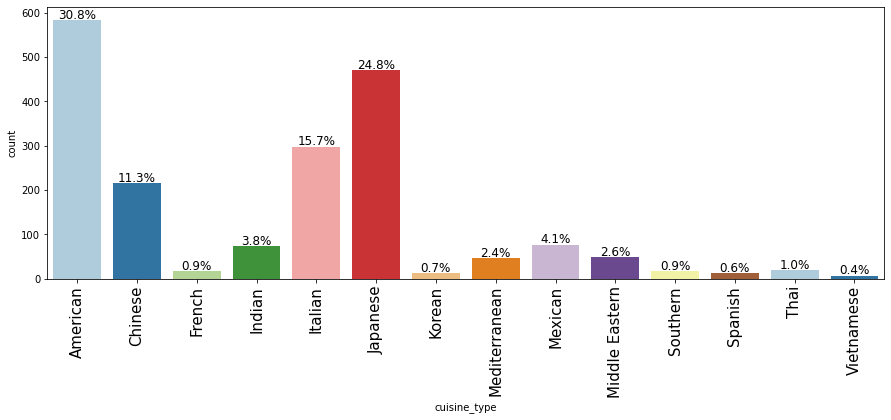

In [19]:
labeled_barplot(df, "cuisine_type", perc=True, n=None)

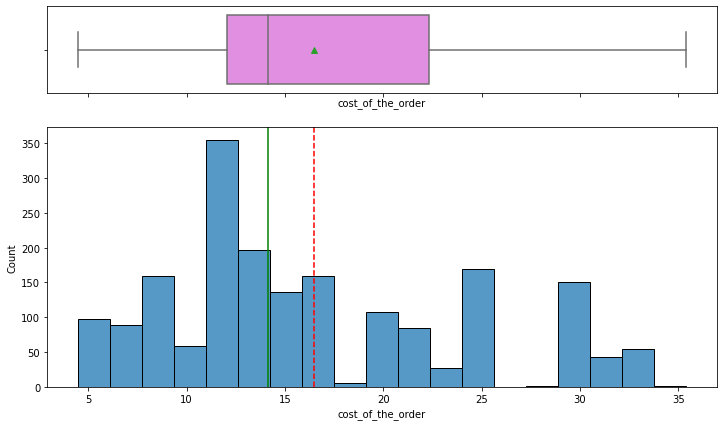

In [20]:
hist_box(df, "cost_of_the_order")

* the mean > median meaning the data is right scewed 
* majority of the meals are on the lower end. Seems folks prefer cheaper meals. 
* No significant outlier

In [21]:
# Days of the week. 
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

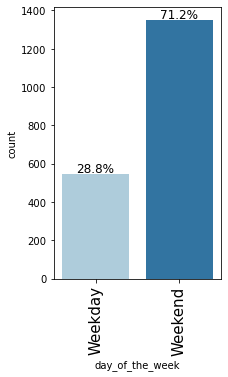

In [22]:
labeled_barplot(df, "day_of_the_week", perc=True, n=None)

* A significant amount of orders are happening on the weekend( 71% of orders)

In [23]:
# Order Ratings 
df.rating.value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

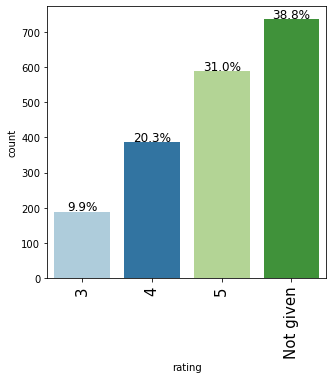

In [24]:
labeled_barplot(df, "rating", perc=True, n=None)

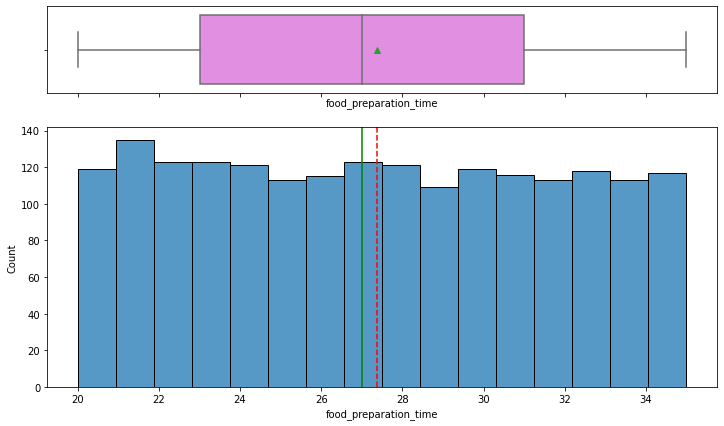

In [25]:
# order preparation time 
hist_box (df, "food_preparation_time", figsize=(12, 7), kde=False, bins=16)

* Mean and median similar, signifying close to symetry
* Data looks almost evenly spread
* Most of the prep time is between 20 - 35 minutes

In [26]:
df.restaurant_name.value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [27]:
# Most popular cuisine on the weekend
df.cuisine_type[df.day_of_the_week=="Weekend"].value_counts().head()


American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

In [28]:
# code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?
print(df[df.cost_of_the_order>20].shape[0])
(df[df.cost_of_the_order>20.00].shape[0]  / df.shape[0]) * 100

555


29.24130663856691

In [29]:
df.delivery_time.mean()
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


In [30]:
#Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. 
# Write the code to find the ID of the customer along with the order details. (1 mark)

df[df.cost_of_the_order==df.cost_of_the_order.max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41000,Weekday,4,21,29


# Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

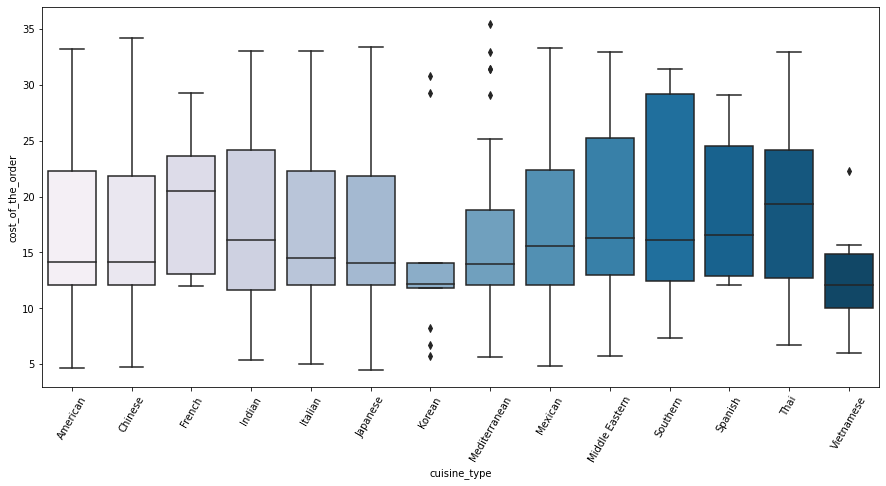

In [31]:
# Relationship between cost of the order and cusine
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='PuBu')
plt.xticks(rotation = 60)
plt.show

* Vietnamese and Korean are the cheapest 
* Outliers are present in costs for Korean, Mediterrian and Vietnamese 
* French and spanish foods are on average the most expensive. 

<function matplotlib.pyplot.show(close=None, block=None)>

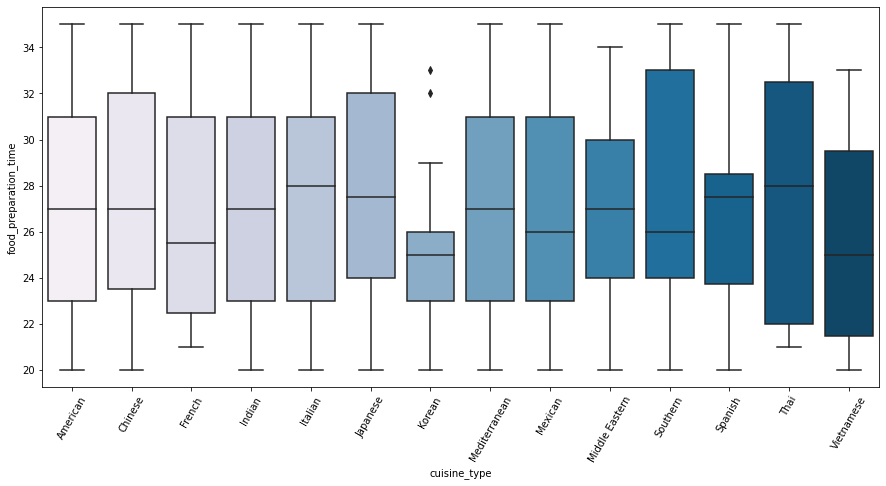

In [32]:
# Relationship between cost of the order and cusine
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='PuBu')
plt.xticks(rotation = 60)
plt.show

* Thai and french food take the longest to prepare
* Some outlier Korean orders can take time. But overall Korean food takes relatively shorter time to prepare. 
* 

<function matplotlib.pyplot.show(close=None, block=None)>

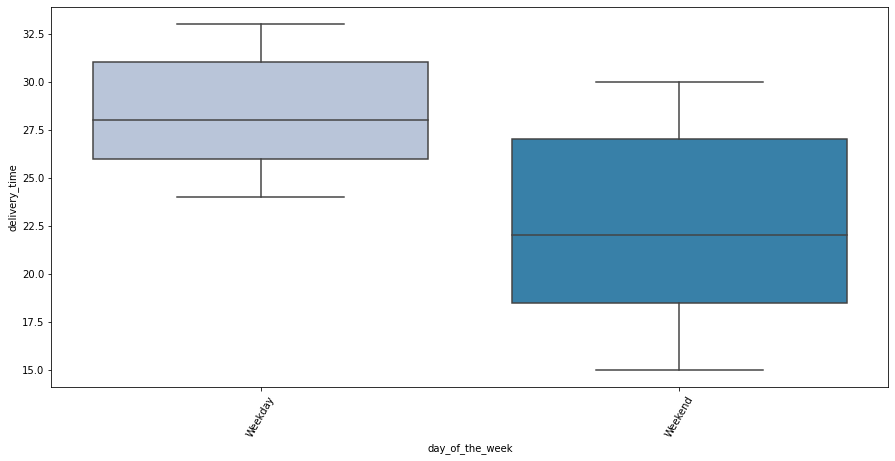

In [33]:
# Relationship between cost of the order and cusine
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='PuBu')
plt.xticks(rotation = 60)
plt.show

Delivery time on weekdays is generally higher than on weekends. 

In [34]:
plt.figure(figsize= (15,7))
df.groupby(['restaurant_name', 'day_of_the_week']).cost_of_the_order.sum().sort_values(ascending=False).head(10)

restaurant_name            day_of_the_week
Shake Shack                Weekend           2341.25000
The Meatball Shop          Weekend           1559.73000
Blue Ribbon Sushi          Weekend           1326.58000
Blue Ribbon Fried Chicken  Weekend           1311.13000
Shake Shack                Weekday           1238.28000
RedFarm Hudson             Weekend            750.51000
RedFarm Broadway           Weekend            721.00000
Parm                       Weekend            649.58000
TAO                        Weekend            646.94000
The Meatball Shop          Weekday            585.48000
Name: cost_of_the_order, dtype: float64

<Figure size 1080x504 with 0 Axes>

### Rating vs Delivery time

<AxesSubplot:xlabel='rating', ylabel='delivery_time'>

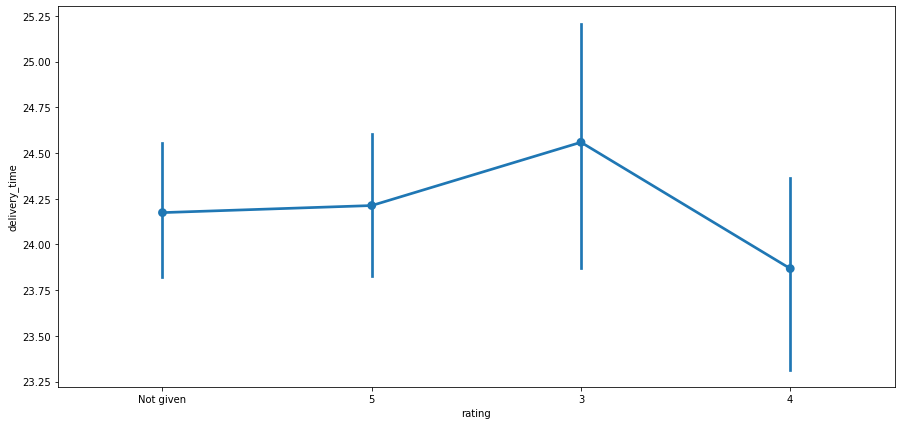

In [38]:
#Relationship between rating and delivery time
plt.figure(figsize=(15,7))
sns.pointplot(data=df, x='rating', y='delivery_time')

Rating between rating and prep time

<AxesSubplot:xlabel='rating', ylabel='food_preparation_time'>

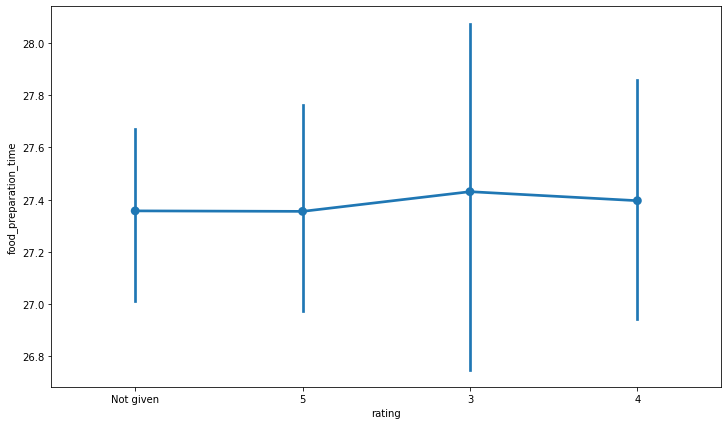

In [44]:
plt.figure(figsize = (12,7))
sns.pointplot(data=df, y='food_preparation_time', x='rating')

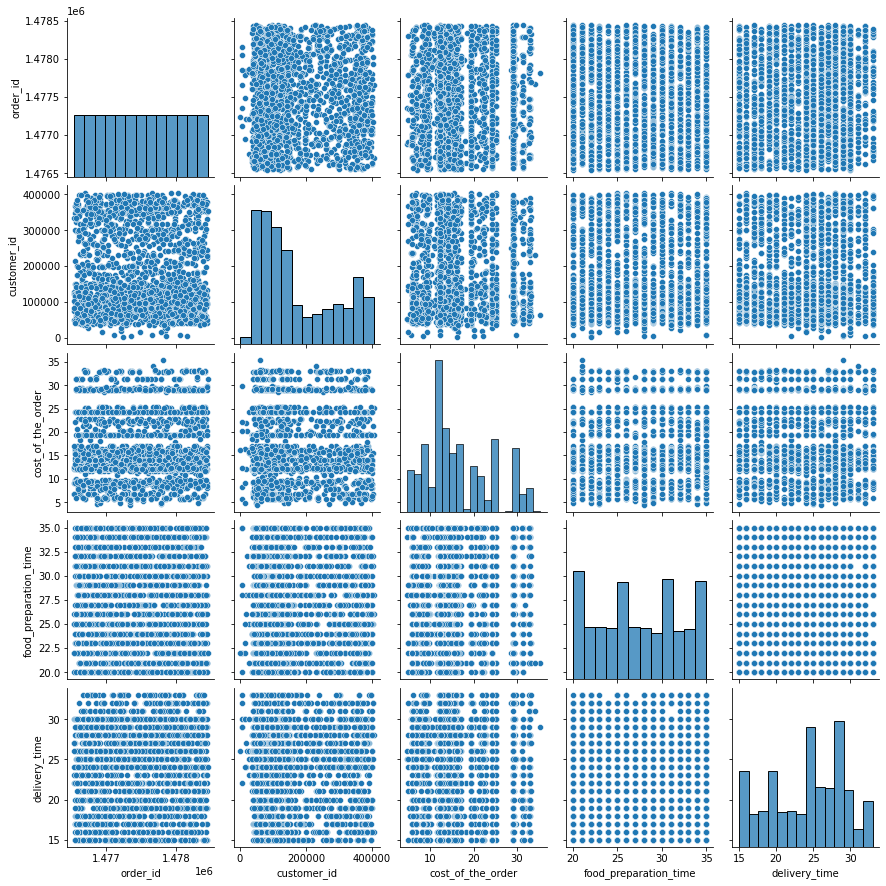

In [46]:
sns.pairplot(data=df)

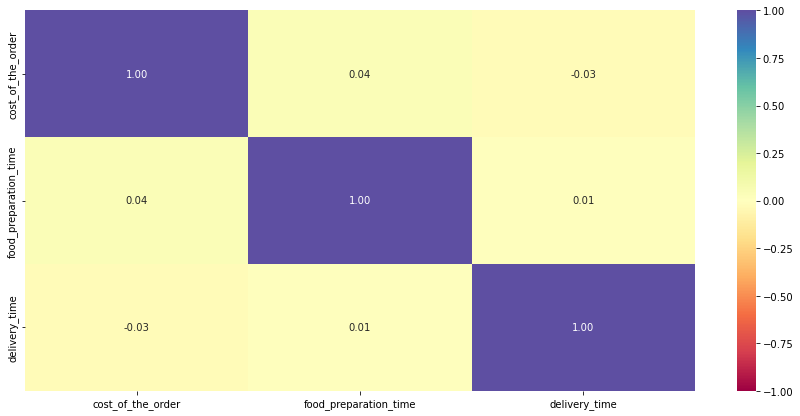

In [47]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()
